# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [1]:
%pip install iso3166

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [2]:
%pip install --upgrade plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 75.0 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.13.1
    Uninstalling plotly-5.13.1:
      Successfully uninstalled plotly-5.13.1


### Import Statements

In [3]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
import iso3166
from datetime import datetime, timedelta

### Notebook Presentation

In [4]:
pd.options.display.float_format = '{:.2f}'.format

### Load the Data

In [5]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [6]:
df_data.shape

(4324, 9)

In [7]:
df_data.tail()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success
4323,4323,4323,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Fri Oct 04, 1957 19:28 UTC",Sputnik 8K71PS | Sputnik-1,StatusRetired,NaN,Success


In [8]:
df_data.isna()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
4319,False,False,False,False,False,False,False,True,False
4320,False,False,False,False,False,False,False,True,False
4321,False,False,False,False,False,False,False,True,False
4322,False,False,False,False,False,False,False,True,False


## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [9]:
clean_df = df_data.dropna()

In [10]:
df_data.drop(columns=['Unnamed: 0.1','Unnamed: 0'], inplace=True)
df_data.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


## Descriptive Statistics

In [11]:
df_data.describe()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
count,4324,4324,4324,4324,4324,964,4324
unique,56,137,4319,4278,2,56,4
top,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Wed Nov 05, 2008 00:15 UTC",Cosmos-3MRB (65MRB) | BOR-5 Shuttle,StatusRetired,450.0,Success
freq,1777,235,2,6,3534,136,3879


In [12]:
df_data['Price'] = pd.to_numeric(df_data['Price'].str.replace(',',''))
df_data['Price'].describe()

count    964.00
mean     153.79
std      288.45
min        5.30
25%       40.00
50%       62.00
75%      164.00
max     5000.00
Name: Price, dtype: float64

# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [13]:
by_organisation = df_data['Organisation'].value_counts()
by_organisation.head()

RVSN USSR           1777
Arianespace          279
CASC                 251
General Dynamics     251
NASA                 203
Name: Organisation, dtype: int64

<Axes: >

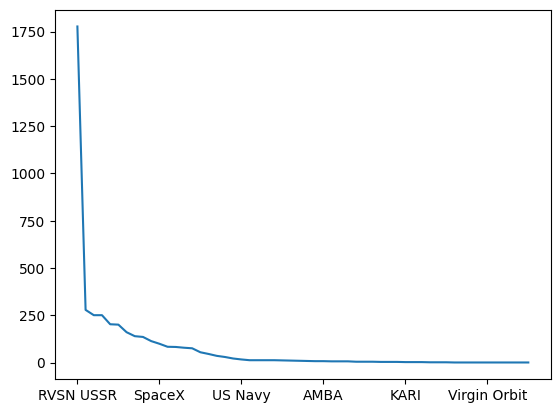

In [14]:
by_organisation.plot()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [15]:
df_data['Rocket_Status'].value_counts()

StatusRetired    3534
StatusActive      790
Name: Rocket_Status, dtype: int64

<Axes: >

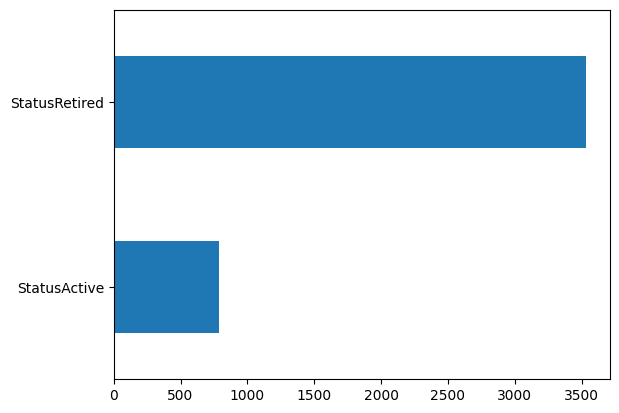

In [16]:
df_data['Rocket_Status'].value_counts().sort_values().plot(kind='barh')

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [17]:
df_data['Mission_Status'].value_counts()

Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: Mission_Status, dtype: int64

In [18]:
df_data.groupby('Mission_Status').agg({'Mission_Status':'count'})

,Mission_Status
Mission_Status,
Failure,339
Partial Failure,102
Prelaunch Failure,4
Success,3879


# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

In [19]:
df = df_data.sort_values(by=["Price"], ascending=[True])
df.dropna()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
102,CASC,"Site 95, Jiuquan Satellite Launch Center, China","Thu Sep 19, 2019 06:42 UTC",Long March 11 | Zhuhai-1 Group 03,StatusActive,5.30,Success
281,CASC,"Site 95, Jiuquan Satellite Launch Center, China","Fri Jan 19, 2018 04:12 UTC","Long March 11 | Jilin-1 07, 08 & Others",StatusActive,5.30,Success
26,CASC,"Xichang Satellite Launch Center, China","Fri May 29, 2020 20:13 UTC",Long March 11 | XJS-G and XJS-H,StatusActive,5.30,Success
176,CASC,"Site 95, Jiuquan Satellite Launch Center, China","Fri Dec 21, 2018 23:51 UTC",Long March 11 | Hongyun-1,StatusActive,5.30,Success
487,CASC,"Site 95, Jiuquan Satellite Launch Center, China","Fri Sep 25, 2015",Long March 11 | Pujian 1 & Others,StatusActive,5.30,Success
...,...,...,...,...,...,...,...
3584,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Mon Mar 03, 1969 16:00 UTC",Saturn V | Apollo 9,StatusRetired,1160.00,Success
3511,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Fri Nov 14, 1969 16:22 UTC",Saturn V | Apollo 12,StatusRetired,1160.00,Success
3545,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Wed Jul 16, 1969 13:32 UTC",Saturn V | Apollo 11,StatusRetired,1160.00,Success
2000,RVSN USSR,"Site 250, Baikonur Cosmodrome, Kazakhstan","Fri May 15, 1987 17:30 UTC",Energiya/Polyus | Polyus Space Station,StatusRetired,5000.00,Success


# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [20]:
country = []
iso = []

for i in df_data['Location']:
  country_name = i.split(', ')[-1]
  if country_name == 'USA' or country_name == 'New Mexico' or country_name == 'Pacific Missile Range Facility' or country_name == 'Gran Canaria':
    country_name = 'United States of America'  
  elif country_name == 'Russia' or country_name == 'Barents Sea':
    country_name = 'Russian Federation'
  elif country_name == 'Yellow Sea':
    country_name = 'China'
  elif country_name == 'Shahrud Missile Test Site' or country_name == 'Iran':
    country_name = 'Iran, Islamic Republic of'  
  elif country_name == 'South Korea':
    country_name = 'Korea, Republic of'
  elif country_name == 'North Korea':
    country_name = "Korea, Democratic People's Republic of"  
  elif country_name == 'Pacific Ocean':
    country_name = 'United States of America'  
  country.append(country_name)
df_data.insert(1,'Country',country)

for i in df_data['Country']:  
  code = iso3166.countries_by_name[i.upper()][2]
  iso.append(code)

df_data.insert(2,'ISO',iso)

df_data.head()

,Organisation,Country,ISO,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,United States of America,USA,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success
1,CASC,China,CHN,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,United States of America,USA,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,Kazakhstan,KAZ,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success
4,ULA,United States of America,USA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success


In [21]:
# 각 ISO 코드의 국가가 몇번의 발사를 했는지 카운트, 이를 새로운 시리즈 데이터 launches로 저장.

launches = df_data['ISO'].value_counts()
launches

RUS    1398
USA    1387
KAZ     701
FRA     303
CHN     269
JPN     126
IND      76
IRN      14
NZL      13
ISR      11
KEN       9
AUS       6
PRK       5
KOR       3
BRA       3
Name: ISO, dtype: int64

In [22]:
# choropleth로 세계지도 그래프 그리기. 국가 구분은 launches의 index 사용, 색의 진하기로 launches의 값(values) 사용
countries_map= px.choropleth(launches,
                             locations=launches.index,
                             color=launches.values,
                             color_continuous_scale='matter')

countries_map.show()

# Use a Choropleth Map to Show the Number of Failures by Country


In [23]:
country = df_data.groupby(['ISO','Mission_Status'],as_index=False).value_counts()
# and를 | 로 대체, Mission_Status가 Failure 이거나 Partial Failure이거나 Prelaunch Failure인 모든 미션을 합산
failure = df_data[(df_data['Mission_Status'] == 'Failure') |
                        (df_data['Mission_Status'] == 'Partial Failure') |
                        (df_data['Mission_Status'] == 'Prelaunch Failure')].groupby('ISO', as_index=False).agg({'Mission_Status':'count'})

failure

,ISO,Mission_Status
0,AUS,3
1,BRA,3
2,CHN,25
3,FRA,18
4,IND,13
5,IRN,9
6,ISR,2
7,JPN,13
8,KAZ,93
9,KOR,2


In [24]:
# choropleth로 세계지도 그래프 그리기. 국가 구분은 failure의 ISO열 데이터 사용, 
# 색의 진하기로 Mission_Status의 값(Failure, Partial Failure, Prelaunch Failure) 사용
countries_map= px.choropleth(failure,
                             locations=failure.ISO,
                             color=failure['Mission_Status'], 
                             color_continuous_scale='matter')

countries_map.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [25]:
df_data.groupby(['Country',
                 'Organisation',
                 'Mission_Status'], as_index=False)

In [26]:
sunburst_chart = px.sunburst(df_data,
                                 path=['Country',
                                       'Organisation',
                                       'Mission_Status'], 
                                 title='Sun Burst')

sunburst_chart.update_layout(coloraxis_showscale=False)

sunburst_chart.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [27]:
df_data.groupby('Organisation').agg({'Price':'sum'})

,Price
Organisation,
AEB,0.00
AMBA,0.00
ASI,0.00
Arianespace,16345.00
Arm??e de l'Air,0.00
Blue Origin,0.00
Boeing,1241.00
CASC,6340.26
CASIC,0.00


# Analyse the Amount of Money Spent by Organisation per Launch

In [28]:
df_data.groupby('Organisation').agg({'Price':'mean'}).dropna()

,Price
Organisation,
Arianespace,170.26
Boeing,177.29
CASC,40.13
EER,20.00
ESA,37.00
Eurockot,41.80
ExPace,28.30
ILS,101.54
ISRO,32.49


# Chart the Number of Launches per Year

In [29]:
df_data['Date'] = pd.to_datetime(df_data['Date'], utc=True)

In [30]:
df_per_year = df_data['Date'].dt.year.value_counts().sort_index()
fig = px.line(df_per_year, 
              x=df_per_year.index.array,
              y='Date',
              title='Number of Launches per Year',
              labels= {'Date': 'Launches',
                       'x': 'Year'
                       })
fig.show()

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

In [31]:
df_per_month = df_data['Date'].dt.month.value_counts().sort_index()
fig = px.line(df_per_month, 
              x=df_per_month.index.array,
              y='Date',
              title='Number of Launches per Momth',
              labels= {'Date': 'Launches',
                       'x': 'Month'
                       })
fig.show()

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [32]:
df_per_month[df_per_month == df_per_month.max()]

12    450
Name: Date, dtype: int64

In [33]:
df_per_month[df_per_month == df_per_month.min()]

1    268
Name: Date, dtype: int64

# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

In [34]:
price_over_time = df_data.groupby(df_data['Date'].dt.year).aggregate({'Price':'mean'})
price_over_time

,Price
Date,
1957,NaN
1958,NaN
1959,NaN
1960,NaN
1961,NaN
...,...
2016,79.46
2017,69.49
2018,64.75


In [35]:
fig = px.line(price_over_time, 
        x=price_over_time.index.array,
        y='Price',
        title='Average Launch Price over Time',
        labels= {
            'Price': 'Average Price (1 Million USD)',
            'x': 'Year'
        })
fig.show()

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

In [36]:
top_10 = df_data.groupby('Organisation', as_index=False).count().sort_values(by='ISO', ascending=False).head(10)['Organisation']
df_top_10 = df_data[df_data['Organisation'].isin(top_10)]

df_top_10

,Organisation,Country,ISO,Location,Date,Detail,Rocket_Status,Price,Mission_Status
1,CASC,China,CHN,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
4,ULA,United States of America,USA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success
5,CASC,China,CHN,"LC-9, Taiyuan Satellite Launch Center, China",2020-07-25 03:13:00+00:00,"Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success
7,CASC,China,CHN,"LC-101, Wenchang Satellite Launch Center, China",2020-07-23 04:41:00+00:00,Long March 5 | Tianwen-1,StatusActive,NaN,Success
12,CASC,China,CHN,"LC-3, Xichang Satellite Launch Center, China",2020-07-09 12:11:00+00:00,Long March 3B/E | Apstar-6D,StatusActive,29.15,Success
...,...,...,...,...,...,...,...,...,...
4307,US Air Force,United States of America,USA,"SLC-17A, Cape Canaveral AFS, Florida, USA",1958-08-17 12:18:00+00:00,Thor-DM 18 Able I | Pioneer 0,StatusRetired,NaN,Failure
4313,RVSN USSR,Kazakhstan,KAZ,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1958-05-15 07:12:00+00:00,Sputnik 8A91 | Sputnik-3 #2,StatusRetired,NaN,Success
4315,RVSN USSR,Kazakhstan,KAZ,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1958-04-27 09:01:00+00:00,Sputnik 8A91 | Sputnik-3 #1,StatusRetired,NaN,Failure
4322,RVSN USSR,Kazakhstan,KAZ,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03 02:30:00+00:00,Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


In [37]:
# Group by date data
df_top_10_dt = df_top_10.groupby(['Date','Organisation']).count().reset_index()
df_top_10_dt

,Date,Organisation,Country,ISO,Location,Detail,Rocket_Status,Price,Mission_Status
0,1957-10-04 19:28:00+00:00,RVSN USSR,1,1,1,1,1,0,1
1,1957-11-03 02:30:00+00:00,RVSN USSR,1,1,1,1,1,0,1
2,1958-04-27 09:01:00+00:00,RVSN USSR,1,1,1,1,1,0,1
3,1958-05-15 07:12:00+00:00,RVSN USSR,1,1,1,1,1,0,1
4,1958-08-17 12:18:00+00:00,US Air Force,1,1,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...
3507,2020-07-09 12:11:00+00:00,CASC,1,1,1,1,1,1,1
3508,2020-07-23 04:41:00+00:00,CASC,1,1,1,1,1,0,1
3509,2020-07-25 03:13:00+00:00,CASC,1,1,1,1,1,1,1
3510,2020-07-30 11:50:00+00:00,ULA,1,1,1,1,1,1,1


In [38]:
df_top_10_dt_year = df_top_10_dt.groupby([df_top_10_dt['Date'].dt.year, 'Organisation']).count()
df_top_10_dt_year.reset_index(level=1, inplace=True)

df_top_10_dt_year

,Organisation,Date,Country,ISO,Location,Detail,Rocket_Status,Price,Mission_Status
Date,,,,,,,,,
1957,RVSN USSR,2,2,2,2,2,2,2,2
1958,NASA,2,2,2,2,2,2,2,2
1958,RVSN USSR,5,5,5,5,5,5,5,5
1958,US Air Force,2,2,2,2,2,2,2,2
1959,General Dynamics,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...
2019,VKS RF,8,8,8,8,8,8,8,8
2020,Arianespace,4,4,4,4,4,4,4,4
2020,CASC,19,19,19,19,19,19,19,19


In [39]:
fig = px.line(df_top_10_dt_year,
    x=df_top_10_dt_year.index.array, 
    y='Location', # Any column with count data
    color='Organisation',
    markers=True,
    title='Number of Launches over Time by the Top 10 Organisations',
    labels= {
        'Location': 'Number of Launches',
        'x': 'Year'
        })
fig.update_layout(xaxis=dict(range=[1957,2020]))
fig.show()

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

In [40]:
# Pandas takes '|' as 'or', '&' as 'and'

coldwar_df = df_data[(df_data['ISO'].isin(['USA', 'RUS', 'KAZ'])) & (df_data['Date'].dt.year <= 1991)]
coldwar_df

,Organisation,Country,ISO,Location,Date,Detail,Rocket_Status,Price,Mission_Status
1718,RVSN USSR,Kazakhstan,KAZ,"Site 175/58, Baikonur Cosmodrome, Kazakhstan",1991-12-20 00:00:00+00:00,Rokot/Briz K | GVM Demo Flight,StatusRetired,NaN,Success
1719,Yuzhmash,Russian Federation,RUS,"Site 32/2, Plesetsk Cosmodrome, Russia",1991-12-18 03:54:00+00:00,Tsyklon-3 | Intercosmos 25 & Magion 3,StatusRetired,NaN,Success
1721,General Dynamics,United States of America,USA,"SLC-36B, Cape Canaveral AFS, Florida, USA",1991-12-07 22:47:00+00:00,Atlas II | Eutelsat 2F3,StatusRetired,NaN,Success
1722,General Dynamics,United States of America,USA,"SLC-3W, Vandenberg AFB, California, USA",1991-11-28 13:23:00+00:00,Atlas-E/F Star-37S-ISS | DMSP F-11,StatusRetired,NaN,Success
1723,RVSN USSR,Russian Federation,RUS,"Site 133/3, Plesetsk Cosmodrome, Russia",1991-11-27 03:30:00+00:00,Cosmos-3M (11K65M) | Cosmos 2173,StatusRetired,NaN,Success
...,...,...,...,...,...,...,...,...,...
4319,US Navy,United States of America,USA,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05 07:33:00+00:00,Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,AMBA,United States of America,USA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01 03:48:00+00:00,Juno I | Explorer 1,StatusRetired,NaN,Success
4321,US Navy,United States of America,USA,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06 16:44:00+00:00,Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,RVSN USSR,Kazakhstan,KAZ,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03 02:30:00+00:00,Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

In [41]:
russia = coldwar_df[coldwar_df['ISO'].isin(['RUS', 'KAZ'])]
russia

,Organisation,Country,ISO,Location,Date,Detail,Rocket_Status,Price,Mission_Status
1718,RVSN USSR,Kazakhstan,KAZ,"Site 175/58, Baikonur Cosmodrome, Kazakhstan",1991-12-20 00:00:00+00:00,Rokot/Briz K | GVM Demo Flight,StatusRetired,NaN,Success
1719,Yuzhmash,Russian Federation,RUS,"Site 32/2, Plesetsk Cosmodrome, Russia",1991-12-18 03:54:00+00:00,Tsyklon-3 | Intercosmos 25 & Magion 3,StatusRetired,NaN,Success
1723,RVSN USSR,Russian Federation,RUS,"Site 133/3, Plesetsk Cosmodrome, Russia",1991-11-27 03:30:00+00:00,Cosmos-3M (11K65M) | Cosmos 2173,StatusRetired,NaN,Success
1725,RVSN USSR,Russian Federation,RUS,"Site 32/1, Plesetsk Cosmodrome, Russia",1991-11-12 20:09:00+00:00,Tsyklon-3 | Cosmos 2165 to 2170,StatusRetired,NaN,Success
1728,RVSN USSR,Russian Federation,RUS,"Site 132/1, Plesetsk Cosmodrome, Russia",1991-10-10 14:00:00+00:00,Cosmos-3M (11K65M) | Cosmos 2164,StatusRetired,NaN,Success
...,...,...,...,...,...,...,...,...,...
4301,RVSN USSR,Kazakhstan,KAZ,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1958-09-23 07:40:00+00:00,Vostok | E-1 n†­1 (Luna-1),StatusRetired,NaN,Failure
4313,RVSN USSR,Kazakhstan,KAZ,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1958-05-15 07:12:00+00:00,Sputnik 8A91 | Sputnik-3 #2,StatusRetired,NaN,Success
4315,RVSN USSR,Kazakhstan,KAZ,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1958-04-27 09:01:00+00:00,Sputnik 8A91 | Sputnik-3 #1,StatusRetired,NaN,Failure
4322,RVSN USSR,Kazakhstan,KAZ,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03 02:30:00+00:00,Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


In [42]:
usa = coldwar_df[coldwar_df['ISO'].isin(['USA'])]
usa

,Organisation,Country,ISO,Location,Date,Detail,Rocket_Status,Price,Mission_Status
1721,General Dynamics,United States of America,USA,"SLC-36B, Cape Canaveral AFS, Florida, USA",1991-12-07 22:47:00+00:00,Atlas II | Eutelsat 2F3,StatusRetired,NaN,Success
1722,General Dynamics,United States of America,USA,"SLC-3W, Vandenberg AFB, California, USA",1991-11-28 13:23:00+00:00,Atlas-E/F Star-37S-ISS | DMSP F-11,StatusRetired,NaN,Success
1724,NASA,United States of America,USA,"LC-39A, Kennedy Space Center, Florida, USA",1991-11-24 23:44:00+00:00,Space Shuttle Atlantis | STS-44,StatusRetired,450.00,Success
1726,Martin Marietta,United States of America,USA,"SLC-4E, Vandenberg AFB, California, USA",1991-11-08 07:07:00+00:00,Titan IV(403)A | SLDCOM & NOSS 3x,StatusRetired,NaN,Success
1732,NASA,United States of America,USA,"LC-39A, Kennedy Space Center, Florida, USA",1991-09-12 23:11:00+00:00,Space Shuttle Discovery | STS-48,StatusRetired,450.00,Success
...,...,...,...,...,...,...,...,...,...
4317,US Navy,United States of America,USA,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-03-17 12:15:00+00:00,Vanguard | Vanguard 1,StatusRetired,NaN,Success
4318,AMBA,United States of America,USA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-03-05 18:27:00+00:00,Juno I | Explorer 2,StatusRetired,NaN,Failure
4319,US Navy,United States of America,USA,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05 07:33:00+00:00,Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,AMBA,United States of America,USA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01 03:48:00+00:00,Juno I | Explorer 1,StatusRetired,NaN,Success


In [43]:
coldwar_df['Country'] = coldwar_df['Country'].replace('Kazakhstan', 'Russian Federation')

# Create the pie chart
fig = px.pie(coldwar_df, names='Country', title='Rocket Launches by Country')

fig.show()

<ipython-input-43-1a6f5789ca52>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

<Axes: xlabel='Date'>

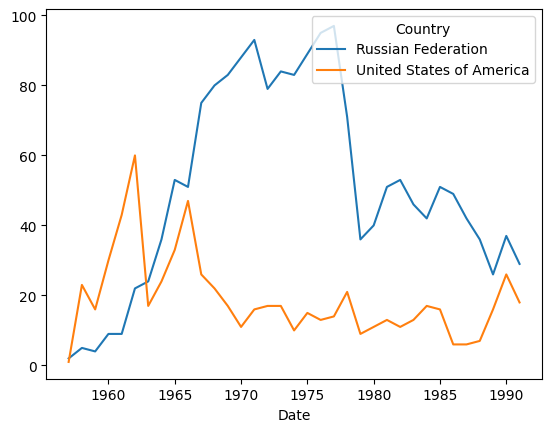

In [44]:
missions_by_year_country = coldwar_df.groupby([coldwar_df.Date.dt.year, 'Country']).size().unstack().plot()
missions_by_year_country

## Chart the Total Number of Mission Failures Year on Year.

In [45]:
coldwar_failure = coldwar_df[(coldwar_df['Mission_Status']=='Failure')|(coldwar_df['Mission_Status']=='Partial Failure')|(coldwar_df['Mission_Status']=='Prelaunch Failure')].sort_values('Date')
coldwar_failure

,Organisation,Country,ISO,Location,Date,Detail,Rocket_Status,Price,Mission_Status
4321,US Navy,United States of America,USA,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06 16:44:00+00:00,Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4319,US Navy,United States of America,USA,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05 07:33:00+00:00,Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4318,AMBA,United States of America,USA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-03-05 18:27:00+00:00,Juno I | Explorer 2,StatusRetired,NaN,Failure
4315,RVSN USSR,Russian Federation,KAZ,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1958-04-27 09:01:00+00:00,Sputnik 8A91 | Sputnik-3 #1,StatusRetired,NaN,Failure
4314,US Navy,United States of America,USA,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-04-28 02:53:00+00:00,Vanguard | Vanguard TV5,StatusRetired,NaN,Failure
...,...,...,...,...,...,...,...,...,...
1795,RVSN USSR,Russian Federation,KAZ,"Site 45/2, Baikonur Cosmodrome, Kazakhstan",1990-10-04 04:27:00+00:00,Zenit-2 | Tselina-2 n†­8,StatusRetired,NaN,Failure
1757,General Dynamics,United States of America,USA,"SLC-36B, Cape Canaveral AFS, Florida, USA",1991-04-18 23:30:00+00:00,Atlas I | Yuri 3H,StatusRetired,NaN,Failure
1746,RVSN USSR,Russian Federation,RUS,"Site 132/1, Plesetsk Cosmodrome, Russia",1991-06-25 13:20:00+00:00,Cosmos-3M (11K65M) | Ta??foun n†­59,StatusRetired,NaN,Failure
1743,Northrop,United States of America,USA,"NB-52B Carrier, Edwards AFB, California, USA",1991-07-21 17:33:00+00:00,Pegasus/HAPS | 7 Microsats,StatusRetired,40.00,Partial Failure


In [46]:
failure_counts = coldwar_failure.groupby([coldwar_failure.Date.dt.year, 'Country'])['Mission_Status'].count().reset_index()

fig = px.line(failure_counts,
    x='Date',
    y='Mission_Status',
    color='Country',
    markers=True,
    title='Number of Failures over Time by the Two Super Powers',
    labels={
        'Date': 'Year',
        'Mission_Status': 'Failures'
    })

fig.show()

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

In [47]:
coldwar_df['Year'] = coldwar_df.Date.dt.year.sort_values()
coldwar_df

<ipython-input-47-f374e9d5c057>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Organisation,Country,ISO,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Year
1718,RVSN USSR,Russian Federation,KAZ,"Site 175/58, Baikonur Cosmodrome, Kazakhstan",1991-12-20 00:00:00+00:00,Rokot/Briz K | GVM Demo Flight,StatusRetired,NaN,Success,1991
1719,Yuzhmash,Russian Federation,RUS,"Site 32/2, Plesetsk Cosmodrome, Russia",1991-12-18 03:54:00+00:00,Tsyklon-3 | Intercosmos 25 & Magion 3,StatusRetired,NaN,Success,1991
1721,General Dynamics,United States of America,USA,"SLC-36B, Cape Canaveral AFS, Florida, USA",1991-12-07 22:47:00+00:00,Atlas II | Eutelsat 2F3,StatusRetired,NaN,Success,1991
1722,General Dynamics,United States of America,USA,"SLC-3W, Vandenberg AFB, California, USA",1991-11-28 13:23:00+00:00,Atlas-E/F Star-37S-ISS | DMSP F-11,StatusRetired,NaN,Success,1991
1723,RVSN USSR,Russian Federation,RUS,"Site 133/3, Plesetsk Cosmodrome, Russia",1991-11-27 03:30:00+00:00,Cosmos-3M (11K65M) | Cosmos 2173,StatusRetired,NaN,Success,1991
...,...,...,...,...,...,...,...,...,...,...
4319,US Navy,United States of America,USA,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05 07:33:00+00:00,Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,1958
4320,AMBA,United States of America,USA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01 03:48:00+00:00,Juno I | Explorer 1,StatusRetired,NaN,Success,1958
4321,US Navy,United States of America,USA,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06 16:44:00+00:00,Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,1957
4322,RVSN USSR,Russian Federation,KAZ,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03 02:30:00+00:00,Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,1957


In [48]:
failure = coldwar_df[(coldwar_df['Mission_Status']=='Failure')|(coldwar_df['Mission_Status']=='Partial Failure')|(coldwar_df['Mission_Status']=='Prelaunch Failure')]
failure

,Organisation,Country,ISO,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Year
1733,RVSN USSR,Russian Federation,KAZ,"Site 45/1, Baikonur Cosmodrome, Kazakhstan",1991-08-30 08:58:00+00:00,Zenit-2 | Tselina-2 n†­9,StatusRetired,NaN,Failure,1991
1743,Northrop,United States of America,USA,"NB-52B Carrier, Edwards AFB, California, USA",1991-07-21 17:33:00+00:00,Pegasus/HAPS | 7 Microsats,StatusRetired,40.00,Partial Failure,1991
1746,RVSN USSR,Russian Federation,RUS,"Site 132/1, Plesetsk Cosmodrome, Russia",1991-06-25 13:20:00+00:00,Cosmos-3M (11K65M) | Ta??foun n†­59,StatusRetired,NaN,Failure,1991
1757,General Dynamics,United States of America,USA,"SLC-36B, Cape Canaveral AFS, Florida, USA",1991-04-18 23:30:00+00:00,Atlas I | Yuri 3H,StatusRetired,NaN,Failure,1991
1795,RVSN USSR,Russian Federation,KAZ,"Site 45/2, Baikonur Cosmodrome, Kazakhstan",1990-10-04 04:27:00+00:00,Zenit-2 | Tselina-2 n†­8,StatusRetired,NaN,Failure,1990
...,...,...,...,...,...,...,...,...,...,...
4314,US Navy,United States of America,USA,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-04-28 02:53:00+00:00,Vanguard | Vanguard TV5,StatusRetired,NaN,Failure,1958
4315,RVSN USSR,Russian Federation,KAZ,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1958-04-27 09:01:00+00:00,Sputnik 8A91 | Sputnik-3 #1,StatusRetired,NaN,Failure,1958
4318,AMBA,United States of America,USA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-03-05 18:27:00+00:00,Juno I | Explorer 2,StatusRetired,NaN,Failure,1958
4319,US Navy,United States of America,USA,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05 07:33:00+00:00,Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,1958


In [49]:
# Group the data by Country, Year, and Mission_Status and calculate the count for each combination
coldwar_grouped = coldwar_df.groupby(['Country', 'Year', 'Mission_Status']).size().reset_index(name='Count')

# Filter for only the failure-related mission statuses
failure_data = coldwar_grouped[coldwar_grouped['Mission_Status'].isin(['Failure', 'Partial Failure', 'Prelaunch Failure'])]

# Calculate the failure rate for each country and year
failure_rate = failure_data.groupby(['Country', 'Year'])['Count'].sum() / coldwar_grouped.groupby(['Country', 'Year'])['Count'].sum()

# Reset the index to convert the grouped data into a DataFrame
failure_rate = failure_rate.reset_index(name='Failure Rate')

# Multiply the failure rate by 100 to get the percentage
failure_rate['Failure Rate'] *= 100
failure_rate

# Create the line chart
fig = px.line(failure_rate, x='Year', y='Failure Rate', color='Country', title='Failure Rate of Space Missions by Year and Country')

# Display the chart
fig.show()

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

In [50]:
country_launches = df_data.groupby(df_data.Date.dt.year)["Country"].value_counts().rename_axis(["year", "Country"]).reset_index(name='counts')
country_launches

,year,Country,counts
0,1957,Kazakhstan,2
1,1957,United States of America,1
2,1958,United States of America,23
3,1958,Kazakhstan,5
4,1959,United States of America,16
...,...,...,...
407,2020,New Zealand,3
408,2020,Russian Federation,3
409,2020,France,2
410,2020,"Iran, Islamic Republic of",2


In [51]:
country_launches.loc[country_launches.groupby("year")["counts"].idxmax()]

,year,Country,counts
0,1957,Kazakhstan,2
2,1958,United States of America,23
4,1959,United States of America,16
6,1960,United States of America,30
8,1961,United States of America,43
...,...,...,...
368,2016,United States of America,27
377,2017,United States of America,30
386,2018,China,39
394,2019,China,34


# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 

In [52]:
org_launches = df_data.groupby(df_data.Date.dt.year)["Organisation"].value_counts().rename_axis(["year", "Organisation"]).reset_index(name='counts')
org_launches

,year,Organisation,counts
0,1957,RVSN USSR,2
1,1957,US Navy,1
2,1958,US Navy,12
3,1958,AMBA,7
4,1958,RVSN USSR,5
...,...,...,...
658,2020,IAI,1
659,2020,IRGC,1
660,2020,ISA,1
661,2020,JAXA,1


In [53]:
org_launches.loc[org_launches.groupby("year")["counts"].idxmax()]

,year,Organisation,counts
0,1957,RVSN USSR,2
2,1958,US Navy,12
7,1959,US Air Force,10
12,1960,US Air Force,21
16,1961,US Air Force,23
...,...,...,...
581,2016,CASC,22
596,2017,SpaceX,18
614,2018,CASC,37
630,2019,CASC,27


In [54]:
fig = px.line(org_launches,
    x='year',
    y='counts',
    color='Organisation',
    markers=True,
    title='Year-on-year organisation launches',
    labels={
        'Date': 'Year',
        'Launches': 'counts'
    })

fig.show()